In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [31]:
meta = pd.read_csv("input_folder/metadata.tsv", sep="\t", index_col=0)
crit1 = meta["Group"] != "S"
crit2 = meta["Hour"] != 0

meta = meta.loc[crit1 & crit2, :]
meta["Hour"] = meta["Hour"].astype(int)
meta["GH"] = meta["Group"] + meta["Hour"].astype(str)

meta.index = [re.sub("H$", "", i) for i in meta.index]
meta.head()

,UniqID,Replicate,Group,Hour,GH
C1-12,C1-12H,C1,C,12,C12
C1-24,C1-24H,C1,C,24,C24
C1-36,C1-36H,C1,C,36,C36
C1-48,C1-48H,C1,C,48,C48
C1-60,C1-60H,C1,C,60,C60


In [43]:
Cmtbl = pd.read_csv("input_folder/C_metabolite.csv", index_col=0)
Cmtbl.drop("Group", inplace=True, axis="columns")
Cmtbl = Cmtbl.T
Cmtbl.index = [re.sub("^[0-9]+. ", "", i) for i in Cmtbl.index]
Cmtbl.columns = [i[0] + i[-1] + "-" + i[1:3] for i in Cmtbl.columns.tolist()]

Cmtbl.head()

,C1-12,C2-12,C3-12,C1-24,C2-24,C3-24,C1-36,C2-36,C3-36,C1-48,C2-48,C3-48,C1-60,C2-60,C3-60,C1-72,C2-72,C3-72
Alpha-tocopherol,1061486.60,1823423.60,1783805.50,873981.90,1070649.90,769109.50,769751.250,814350.700,747972.000,960579.060,823229.100,900586.0000,537610.7500,1201347.800,1031645.100,1101747.500,1641483.000,1055505.50
Daidzin,251774.48,507745.56,515688.66,250462.27,162892.78,147894.61,4558.805,11708.883,25478.264,81234.680,15139.223,20395.6620,4001.8142,23284.285,138549.380,38759.790,31776.064,49998.50
Genistin,456326.34,952130.00,1027604.20,465559.28,344698.50,291101.53,39568.590,70742.250,116471.590,276102.600,73879.766,81096.0100,40068.0080,144921.440,459045.840,205242.950,182446.230,215557.80
Phosphatidylcholine,802146.94,1561929.40,1262719.90,760769.56,1193073.90,639320.75,0.000,115190.920,185940.220,31833.059,8941.387,5114.4897,0.0000,22843.621,22499.186,27319.342,166830.400,85278.36
1-Monolinolenin,597118.56,863723.30,566974.00,3620347.00,3405275.80,2355640.50,338439.500,416923.100,486393.380,361604.720,231767.900,239009.9000,159327.6200,190425.160,159515.610,181270.390,162708.880,159609.58


In [44]:
Mmtbl = pd.read_csv("input_folder/M_metabolite.csv", index_col=0)
Mmtbl.drop("Group", inplace=True, axis="columns")
Mmtbl = Mmtbl.T
Mmtbl.index = [re.sub("^[0-9]+. ", "", i) for i in Mmtbl.index]
Mmtbl.columns = [i[0] + i[-1] + "-" + i[1:3] for i in Mmtbl.columns.tolist()]

Mmtbl.head()

,M1-12,M2-12,M3-12,M1-24,M2-24,M3-24,M1-36,M2-36,M3-36,M1-48,M2-48,M3-48,M1-60,M2-60,M3-60,M1-72,M2-72,M3-72
Alpha-tocopherol,1999898.60,2408046.80,2132898.00,800085.440,820361.560,745077.060,1136264.10,740252.3,785144.56,842538.100,772832.94,691482.100,1135416.000,1059940.20,1001886.600,7.620253e+05,853008.000,884215.700
Dilinoleoylphosphatidylcholine,34422.86,1159580.40,171266.47,56848.906,41515.074,45794.086,0.00,0.0,22713.18,34608.027,29205.18,11427.373,25194.652,47463.30,9561.123,7.298773e+03,15205.408,15737.726
Phosphatidylcholine,233689.81,316211.03,304162.66,4890119.500,3948214.500,5492187.000,5387124.50,6555927.5,6105102.50,4471360.000,4826208.50,4552908.500,5217110.500,5620922.50,5228748.500,3.416015e+06,4264215.500,4280013.000
Glyceryl monolinoleate,553351.30,621673.94,605402.70,6034755.500,5255037.000,6984371.500,2984877.00,3237245.8,4027709.80,1658794.600,2037373.20,2215857.800,1950378.200,1988600.00,1941140.100,1.345230e+06,1745734.200,1722034.500
1-Monolinolenin,197861.40,261595.11,234654.33,2386939.200,1919061.000,2805007.500,1012800.56,1095312.1,1232337.90,537523.900,595485.20,602324.100,561970.600,586733.06,531196.250,3.572382e+05,444325.500,447305.600


In [51]:
Cmtbl.merge(Mmtbl, how="outer", left_index=True, right_index=True)\
    .loc[:, ["C1-12", "C2-12", "C3-12", "M1-12", "M2-12", "M3-12"]]

,C1-12,C2-12,C3-12,M1-12,M2-12,M3-12
1-Monolinolenin,597118.56,863723.30,566974.00,197861.40,261595.110,234654.330
Alpha-LA,3592325.20,4627277.00,4027528.80,3100759.50,3734120.800,3139053.500
Alpha-tocopherol,1061486.60,1823423.60,1783805.50,1999898.60,2408046.800,2132898.000
Daidzein,NaN,NaN,NaN,2837991.80,3626441.800,2670319.200
Daidzin,251774.48,507745.56,515688.66,NaN,NaN,NaN
Dilinoleoylphosphatidylcholine,NaN,NaN,NaN,34422.86,1159580.400,171266.470
Ethyl linolenate,NaN,NaN,NaN,508485.12,778076.440,551104.500
Farnesylacetone,NaN,NaN,NaN,783753.94,893556.200,891215.700
Gamma-linolenamide,0.00,0.00,0.00,NaN,NaN,NaN
Genistein,NaN,NaN,NaN,3474819.00,4390524.000,3247964.200


In [22]:
meta = meta.merge(mtbl, left_index=True, right_index=True)

In [28]:
f = meta.melt(id_vars=["UniqID", "Replicate", "Group", "Hour", "GH", 'Mtbl_Group'])
f.rename(columns={"variable": "Metabolite"}, inplace=True)
f.style

,UniqID,Replicate,Group,Hour,GH,Mtbl_Group,Metabolite,value
0,M1-12H,M1,M,12,M12,1,1. Alpha-tocopherol,1999898.600000
1,M1-24H,M1,M,24,M24,2,1. Alpha-tocopherol,800085.440000
2,M1-36H,M1,M,36,M36,3,1. Alpha-tocopherol,1136264.100000
3,M1-48H,M1,M,48,M48,4,1. Alpha-tocopherol,842538.100000
4,M1-60H,M1,M,60,M60,5,1. Alpha-tocopherol,1135416.000000
5,M1-72H,M1,M,72,M72,6,1. Alpha-tocopherol,762025.300000
6,M2-12H,M2,M,12,M12,1,1. Alpha-tocopherol,2408046.800000
7,M2-24H,M2,M,24,M24,2,1. Alpha-tocopherol,820361.560000
8,M2-36H,M2,M,36,M36,3,1. Alpha-tocopherol,740252.300000
9,M2-48H,M2,M,48,M48,4,1. Alpha-tocopherol,772832.940000


<Axes: xlabel='Metabolite', ylabel='Group'>

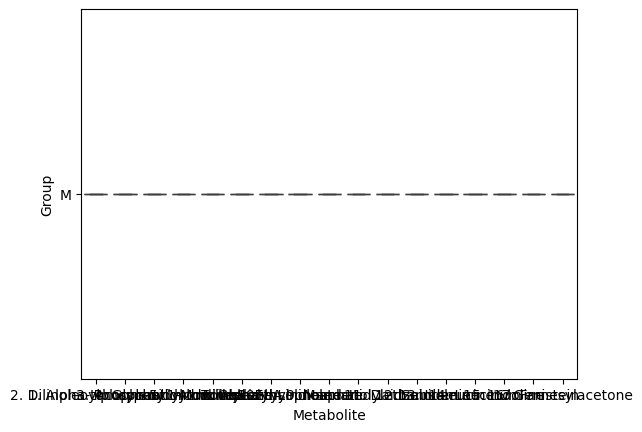

In [29]:
sns.boxplot(f, x="Metabolite", y="Group")